## **LSTM**

---



### **Keras's Recurrent layer**

---

### `[Problem 1] Execution of various methods`

---


In [1]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
from keras import backend as K
from keras.utils import pad_sequences

In [2]:
max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
17464789/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)


**- LSTM**

In [3]:
print('Build model...')
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...


Train...
Epoch 1/15
782/782 [==============================] - 331s 407ms/step - loss: 0.4404 - accuracy: 0.7910 - val_loss: 0.3681 - val_accuracy: 0.8402
Epoch 2/15
782/782 [==============================] - 287s 367ms/step - loss: 0.2551 - accuracy: 0.8959 - val_loss: 0.3703 - val_accuracy: 0.8392
Epoch 3/15
782/782 [==============================] - 286s 366ms/step - loss: 0.1638 - accuracy: 0.9383 - val_loss: 0.5203 - val_accuracy: 0.8306
Epoch 4/15
782/782 [==============================] - 289s 369ms/step - loss: 0.1047 - accuracy: 0.9622 - val_loss: 0.6321 - val_accuracy: 0.8222
Epoch 5/15
782/782 [==============================] - 284s 363ms/step - loss: 0.0741 - accuracy: 0.9736 - val_loss: 0.6644 - val_accuracy: 0.8207
Epoch 6/15
782/782 [==============================] - 284s 364ms/step - loss: 0.0499 - accuracy: 0.9834 - val_loss: 0.6995 - val_accuracy: 0.8221
Epoch 7/15
782/782 [==============================] - 289s 369ms/step - loss: 0.0355 - accuracy: 0.9874 - val_loss:

**- SimpleRNN**

In [4]:
from keras.layers import SimpleRNN

print('Build model Simple RNN')
simplernnmodel = Sequential()

simplernnmodel.add(Embedding(max_features, 128))
simplernnmodel.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
simplernnmodel.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
simplernnmodel.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
simplernnmodel.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = simplernnmodel.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Simple RNN Test score:', score)
print('Simpke RNN Test accuracy:', acc)

Build model Simple RNN
Train...
Epoch 1/15
782/782 [==============================] - 126s 159ms/step - loss: 0.6846 - accuracy: 0.5470 - val_loss: 0.6445 - val_accuracy: 0.6089
Epoch 2/15
782/782 [==============================] - 107s 136ms/step - loss: 0.5558 - accuracy: 0.7171 - val_loss: 0.6314 - val_accuracy: 0.6326
Epoch 3/15
782/782 [==============================] - 102s 130ms/step - loss: 0.5438 - accuracy: 0.7222 - val_loss: 0.5152 - val_accuracy: 0.7549
Epoch 4/15
782/782 [==============================] - 105s 135ms/step - loss: 0.4500 - accuracy: 0.7956 - val_loss: 0.5006 - val_accuracy: 0.7745
Epoch 5/15
782/782 [==============================] - 104s 134ms/step - loss: 0.4935 - accuracy: 0.7639 - val_loss: 0.5892 - val_accuracy: 0.7326
Epoch 6/15
782/782 [==============================] - 100s 128ms/step - loss: 0.4428 - accuracy: 0.8007 - val_loss: 0.5689 - val_accuracy: 0.7650
Epoch 7/15
782/782 [==============================] - 100s 128ms/step - loss: 0.4193 - accur

**- GRU**

In [5]:
from keras.layers import GRU

print('Build model GRU')
grumodel = Sequential()

grumodel.add(Embedding(max_features, 128))
grumodel.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
grumodel.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
grumodel.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
grumodel.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = grumodel.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('GRU Test score:', score)
print('GRU Test accuracy:', acc)

Build model GRU
Train...
Epoch 1/15
782/782 [==============================] - 273s 345ms/step - loss: 0.4448 - accuracy: 0.7852 - val_loss: 0.3562 - val_accuracy: 0.8416
Epoch 2/15
782/782 [==============================] - 251s 321ms/step - loss: 0.2497 - accuracy: 0.8999 - val_loss: 0.3549 - val_accuracy: 0.8484
Epoch 3/15
782/782 [==============================] - 253s 324ms/step - loss: 0.1483 - accuracy: 0.9442 - val_loss: 0.4027 - val_accuracy: 0.8336
Epoch 4/15
782/782 [==============================] - 252s 322ms/step - loss: 0.0836 - accuracy: 0.9716 - val_loss: 0.5703 - val_accuracy: 0.8296
Epoch 5/15
782/782 [==============================] - 250s 320ms/step - loss: 0.0487 - accuracy: 0.9824 - val_loss: 0.6585 - val_accuracy: 0.8209
Epoch 6/15
782/782 [==============================] - 252s 323ms/step - loss: 0.0315 - accuracy: 0.9889 - val_loss: 0.8686 - val_accuracy: 0.8193
Epoch 7/15
782/782 [==============================] - 247s 316ms/step - loss: 0.0222 - accuracy: 0.

SimpleRNN couldn't store past information long ago, and could only consider data connections at short time intervals. Simple RNN Test score: 0.6868075728416443 Simple RNN Test accuracy: 0.6621999740600586

LSTM has a mechanism to store data, and it has become possible to consider the connection of data at long time intervals. Test score: 1.1158136129379272 Test accuracy: 0.810920000076294

GRU is a model that simplifies LSTM. The input gate and the forgetting gate are integrated into one gate as an "update gate". GRU Test score: 1.3118441104888916 GRU Test accuracy: 0.8164399862289429

**- ConvLSTM2D**

<ipython-input-6-5ac18857e685>:51: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
<ipython-input-6-5ac18857e685>:53: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.float)


Epoch 1/3
95/95 [==============================] - 54s 434ms/step - loss: 0.7985 - val_loss: 0.7698
Epoch 2/3
95/95 [==============================] - 41s 434ms/step - loss: 0.7270 - val_loss: 0.7767
Epoch 3/3
1/1 [==============================] - 0s 80ms/step


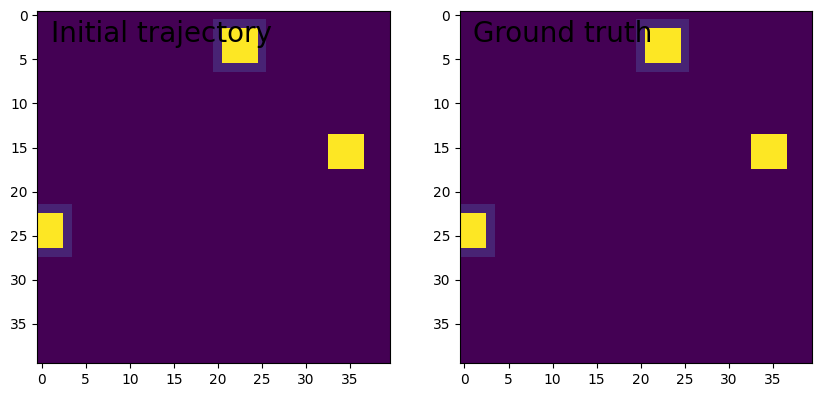

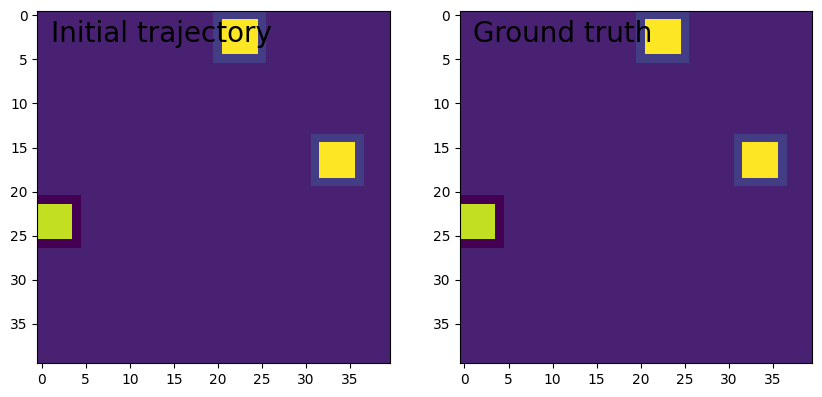

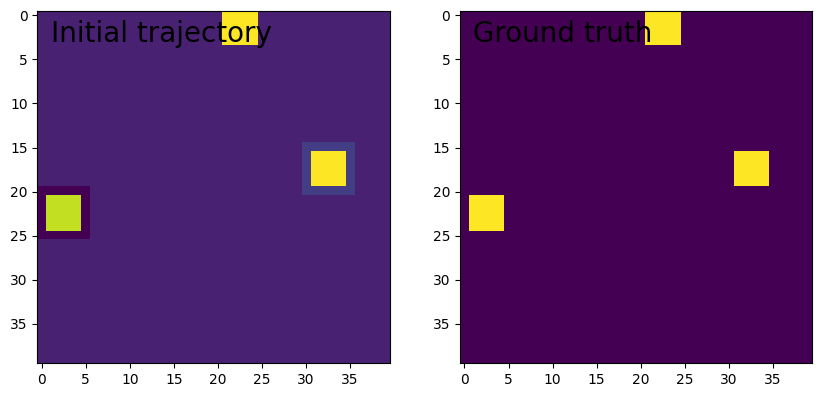

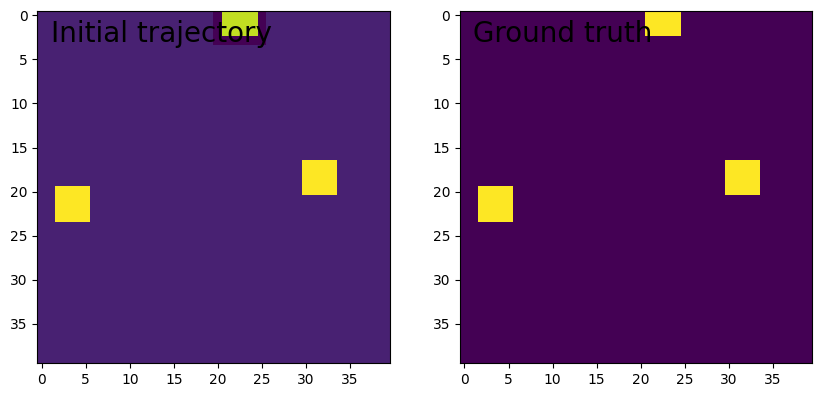

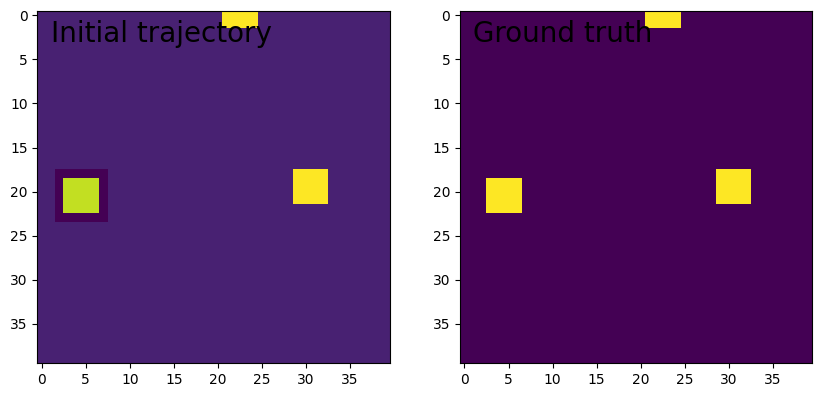

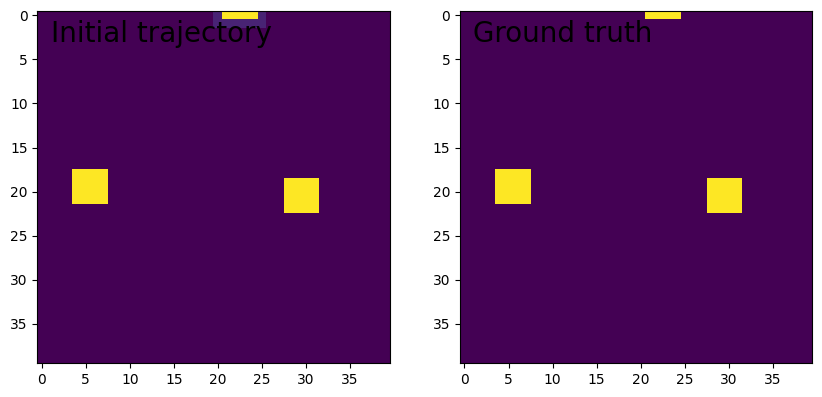

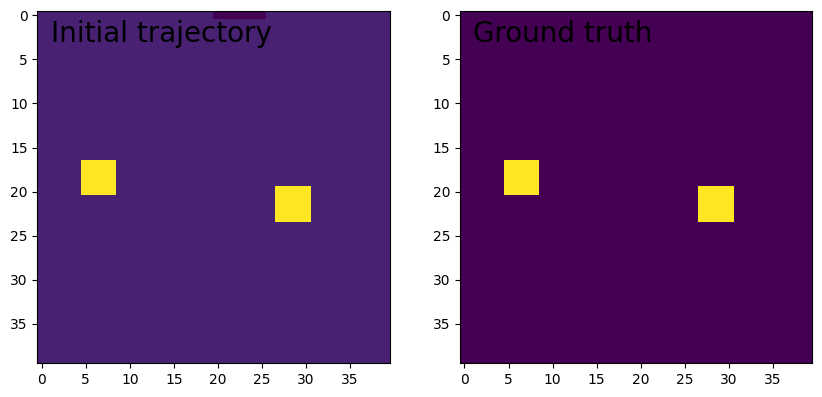

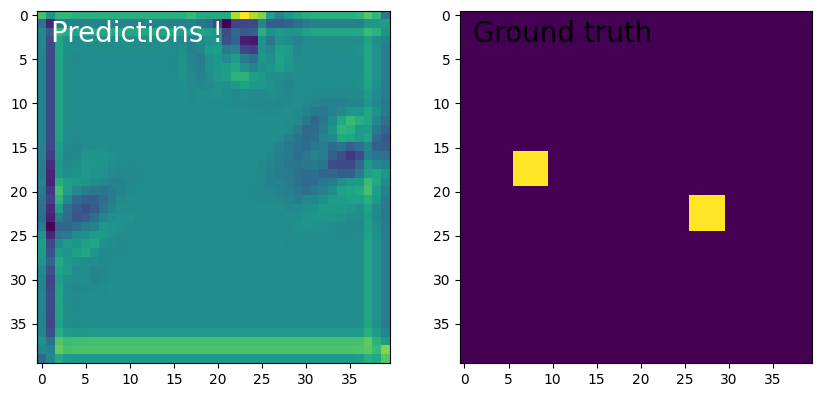

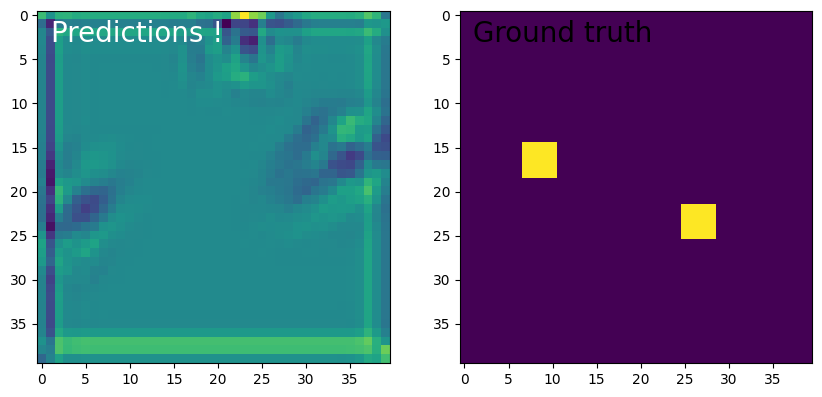

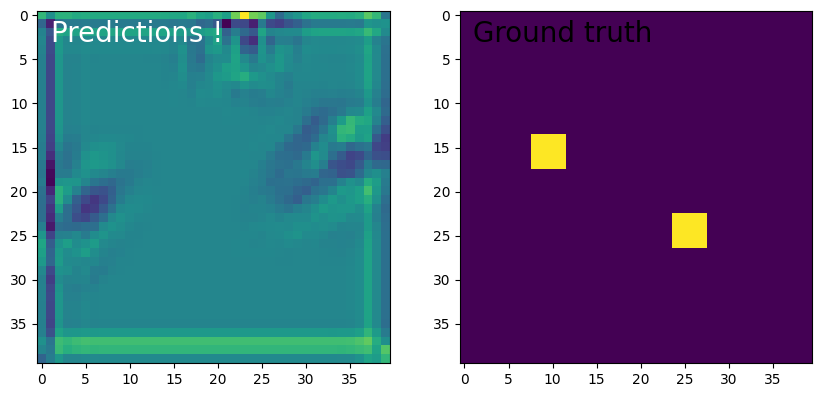

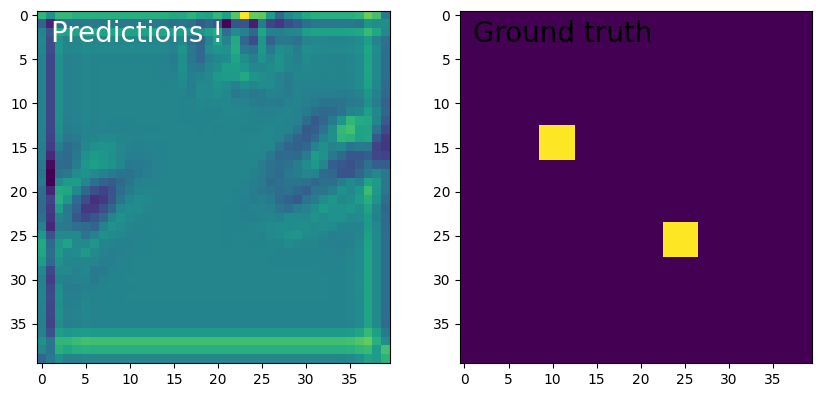

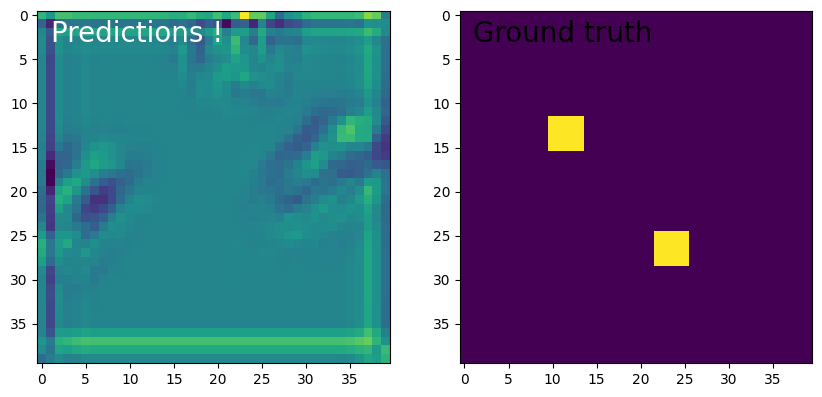

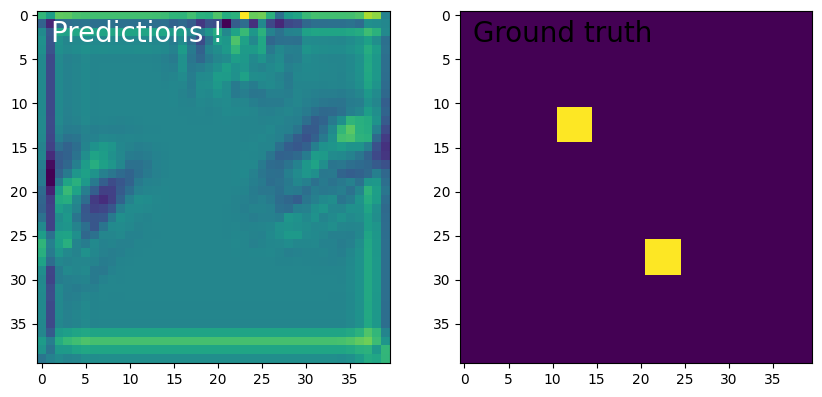

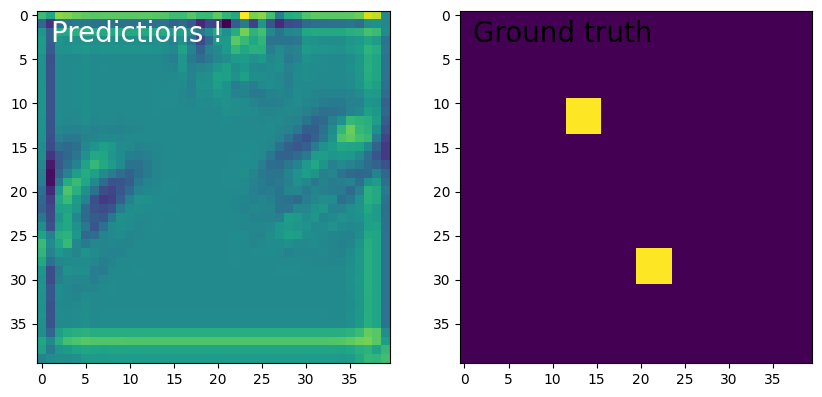

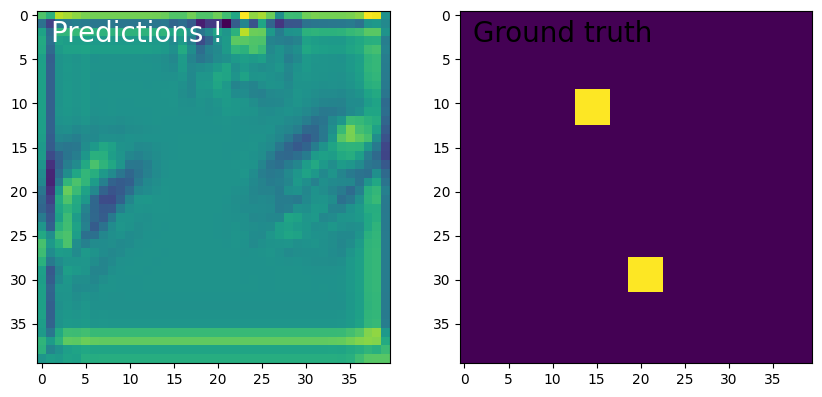

In [6]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers import ConvLSTM2D
from keras.layers import BatchNormalization
import numpy as np
import pylab as plt
from keras import backend as K

if K.backend() == 'mxnet':
    raise NotImplementedError("MXNet Backend: ConvLSTM2D Layer is not supported yet.")

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=3, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

### **`[Problem 2] (Advance assignment) Comparison between multiple data sets`**

---



In [ ]:
from keras.datasets import reuters

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

### **`[Problem 3] Explanation of other classes`**

---



- RNN: A recurrent neural network (RNN) is a class of artificial neural networks where connections between nodes form a directed graph along a temporal sequence.
- SimpleRNNCell - SimpleRNN Cell class- A Recurrent neural network can be seen as the repetition of a single cell.
- GRUCell: It is a cell class for gru layer, which is a recursive unit with a gate that simplifies LSTM
- LSTMCell: It is basically the Cell class for LSTM layer that contains the calculation logic for one step
- StackedRNNCells: It is wrapper to make the behavior of the RNN cell stack look like a single cell
- CuDNNGRU: It is a high-speed GRU implementation using CuDNN.
- CuDNNLSTM: It is a high-speed LSTM implementation using CuDNN